### OpenCV 5 주차

### 6.2 미디안, 블러, 가우시안

### 6.3 sobel 필터

In [1]:
# 0603.py
import cv2
import numpy as np

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

#2
dstX = cv2.sqrt(np.abs(gx))
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#3
dstY = cv2.sqrt(np.abs(gy))
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#4
mag   = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('mag:', minVal, maxVal, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2.imshow('src',  src)
# cv2.imshow('dstX',  dstX)    
# cv2.imshow('dstY',  dstY)
cv2.imshow('dstM',  dstM)
cv2.imshow('src_M', cv2.add(src, dstM))
cv2.waitKey()
cv2.destroyAllWindows()


mag: 0.0 713.2684936523438 (0, 0) (415, 148)


### 6.4 sobel 필터2, 에지 그래디언트

angle: 0.0 359.8861083984375 (0, 0) (357, 120)


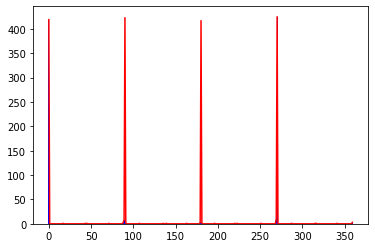

In [5]:
# 0604.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('c:/data/rect.jpg', cv2.IMREAD_GRAYSCALE)
##src = cv2.imread('./data/line.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(angle)
print('angle:', minVal, maxVal, minLoc, maxLoc)

#2
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)
cv2.imshow('edge',  edge)

#3
height, width = mag.shape[:2]
angleM = np.full((height,width, 3), (255, 255, 255), dtype= np.uint8)
for y in range(height):
    for x in range(width):
        if edge[y, x] != 0: # if mag[y, x] > 100: # edge
            if angle[y, x] ==   0:
                angleM[y, x] =  (0, 0, 255)   # red
            elif angle[y, x] == 90:
                 angleM[y, x] = (0, 255, 0)   # green
            elif angle[y, x] ==180:
                 angleM[y, x] = (255, 0, 0)   # blue                 
            elif angle[y, x] ==270:
                 angleM[y, x] = (0, 255, 255) # yellow
            else:
                angleM[y, x] =  (128, 128, 128) # gray                
cv2.imshow('angleM',  angleM)

#4
hist = cv2.calcHist(images=[angle], channels=[0], mask=edge,
                    histSize=[360], ranges=[0, 360])

hist = hist.flatten()
#plt.title('hist: binX = np.arange(360)')
plt.plot(hist, color='r')
binX = np.arange(360)
plt.bar(binX, hist, width=1, color='b')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()


### 6.5 라플라시안 필터

In [1]:
import cv2
import numpy as np

#1
src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur= cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
cv2.imshow('src',  src)
# cv2.imshow('blur', blur)

#2
lap  = cv2.Laplacian(src, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print('lap:', minVal, maxVal, minLoc, maxLoc)
dst = cv2.convertScaleAbs(lap)
dst = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
# cv2.imshow('lap',  lap)
# cv2.imshow('dst',  dst)

#3
lap2 = cv2.Laplacian(blur, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap2)
print('lap2:', minVal, maxVal, minLoc, maxLoc)
dst2 = cv2.convertScaleAbs(lap2)
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('lap2',  lap2)
cv2.imshow('dst2',  dst2)
cv2.imshow('result', cv2.subtract(src, dst2)) # 영상 덧셈

cv2.waitKey()    
cv2.destroyAllWindows()

lap: -239.0 189.0 (404, 181) (221, 287)
lap2: -35.0 30.0 (180, 435) (367, 449)


### 6.6 라플라시안 2차 미분

In [4]:
# 0606.py
import cv2
import numpy as np

#1
#src  = cv2.imread('./data/A.bmp', cv2.IMREAD_GRAYSCALE)
src  = cv2.imread('c:/data/test_bone.png', cv2.IMREAD_GRAYSCALE)
#src  = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
lap = cv2.Laplacian(blur, cv2.CV_32F,3)

##ret, edge = cv2.threshold(np.abs(lap), 10, 255, cv2.THRESH_BINARY)
##edge = edge.astype(np.uint8)
##cv2.imshow('edge',  edge)

#2
def SGN(x):
    if x >= 0:
        sign = 1
    else:
        sign = -1
    return sign

def zeroCrossing(lap):
    height, width = lap.shape
    Z = np.zeros(lap.shape, dtype=np.uint8)    
    for y in range(1, height-1):
        for x in range(1,width-1):
            neighbors=[lap[y-1,x], lap[y+1,x], lap[y,x-1], lap[y,x+1],
                       lap[y-1,x-1], lap[y-1,x+1], lap[y+1,x-1], lap[y+1,x+1]]                       
            mValue= min(neighbors)
            if SGN(lap[y,x]) != SGN(mValue):
                Z[y, x] = 255
    return Z
edgeZ = zeroCrossing(lap)
cv2.imshow('src', src)
cv2.imshow('Zero Crossing',  edgeZ)
cv2.imshow('result', cv2.add(src, edgeZ, dtype=np.uint8))
cv2.waitKey()    
cv2.destroyAllWindows()

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'add'
> Overload resolution failed:
>  - Argument 'dtype' is required to be an integer
>  - Argument 'dtype' is required to be an integer


: 

### 6.7 

### 6.8 LoG 필터링

In [1]:
# 0608.py
import cv2
import numpy as np

src  = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

#1
def logFilter(ksize=7):
    k2 = ksize//2
    sigma = 0.3*(k2-1) + 0.8
    print('sigma=', sigma)
    LoG = np.zeros((ksize, ksize), dtype=np.float32)
    for y in range(-k2, k2+1):
        for x in range(-k2, k2+1):
            g = -(x*x+y*y)/(2.0*sigma**2.0)
            LoG[y+k2, x+k2] = -(1.0+g)*np.exp(g)/(np.pi*sigma**4.0)
    return LoG

#2
kernel = logFilter() #7, 15, 31, 51
LoG = cv2.filter2D(src, cv2.CV_32F, kernel)
cv2.imshow('LoG',  LoG)

#3
def zeroCrossing2(lap, thresh=0.01):
    height, width = lap.shape
    Z = np.zeros(lap.shape, dtype=np.uint8)    
    for y in range(1, height-1):
        for x in range(1,width-1):
            neighbors=[lap[y-1,x],   lap[y+1,x],   lap[y,x-1],   lap[y,x+1],
                       lap[y-1,x-1], lap[y-1,x+1], lap[y+1,x-1], lap[y+1,x+1]]
            pos = 0
            neg = 0
            for value in neighbors:
                if value > thresh:
                    pos += 1
                if value < -thresh:  # value < thresh
                    neg += 1
            if pos > 0 and neg > 0:
                Z[y, x] = 255                        
    return Z
edgeZ = zeroCrossing2(LoG)
cv2.imshow('Zero Crossing2',  edgeZ)
cv2.waitKey()    
cv2.destroyAllWindows()


sigma= 1.4
